In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v3.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,datacenter,74620.259307,1,storage,900000.0,14848.0,75.045989,1.000011843801415:,316.533532,435.266735,3.000036,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.527644938419229:2-878231,1024,5....",NaN
1,3,datacenter,74620.259307,2,storage,900000.0,25088.0,126.765213,1.0000001634360047:,316.533532,735.238233,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1-612639,4096,20.692570051259533:304371,3584,1...",NaN
2,3,datacenter,74620.259307,3,storage,900000.0,24576.0,139.717016,1.000000197764156:,316.533532,810.358690,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-55872,3072,15.521324441002905:303623,3584,18...",NaN
3,3,datacenter,74620.259307,4,storage,900000.0,30720.0,168.149131,1.0000003700028652:,316.533532,975.264957,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-878237,1024,5.187122965529541:304462,3584,18...",NaN
4,3,datacenter,74620.259307,5,storage,900000.0,12800.0,64.705854,1.0000004590101392:,316.533532,375.293953,3.000001,0.003,0.004,198.0,False,3.0,5.8,"16601,512,2.596673335321235:285602,512,2.60125...",NaN


## Energy Consumption

#### Maximum energy consumption of persistent storage

The datacenter 'datacenter' current persistent storage infrastructure at max can consume 0.5800000000000001 Joules (J) per second.


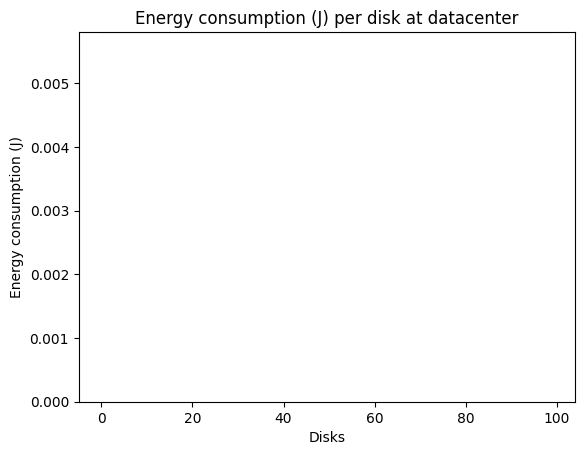

The cloud providers current computing infrastructure at max can consume 0.5800000000000001 Joules (J) per second.


In [2]:
labels = np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_disk = np.array([])

max_power_consumed = 0
max_power_consumed_per_disk = np.array([])

duration_per_disk = np.array([])

for i in range(len(labels)):
    max_power_per_datacenter = 0
    max_power_per_disk_per_datacenter = np.array([])
    
    max_power_consumed_per_datacenter = 0
    max_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
                
        active_power = float(sample['active_power'])
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        max_consumed_active_power = float(sample['active_power']) * float(sample['duration'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        max_power_per_datacenter += active_power
        max_power_per_disk = np.append(max_power_per_disk, active_power)
        max_power_per_disk_per_datacenter = np.append(max_power_per_disk_per_datacenter, active_power)
        duration_per_disk_per_datacenter = np.append(duration_per_disk_per_datacenter, sample['duration'])
        
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(max_power_per_datacenter * 1)/1000} Joules (J) per second.")
    max_power += max_power_per_datacenter
    plt.plot(np.arange(0, len(max_power_per_disk_per_datacenter)), ((max_power_per_disk_per_datacenter*1)/1000))
    plt.ylim((0, ((max(max_power_per_disk_per_datacenter)*1)/1000)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)/1000} Joules (J) per second.")

#### Current energy consumption of persistent storage

The datacenter 'datacenter' current persistent storage infrastructure is consumes 0.33920000000000006 Kilo Joules (kJ) per second.
The datacenter 'datacenter' current persistent storage infrastructure is consuming 130.83880462102627 Kilo Joules (kJ) over the duration 316.53353194238684s.


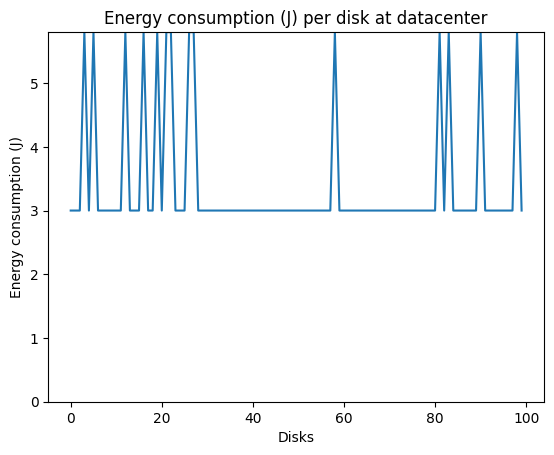

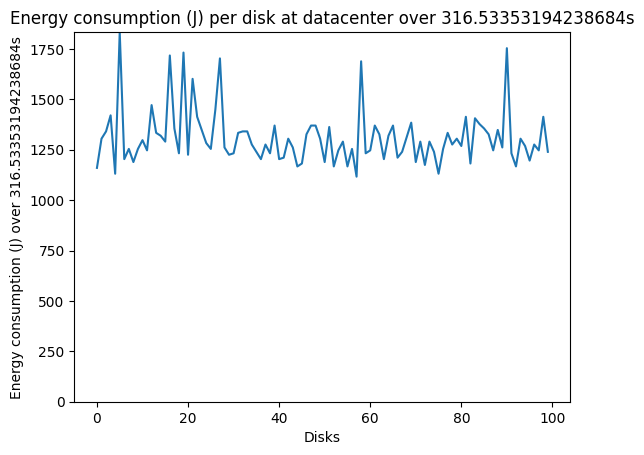

The cloud providers current storage area network consumes 0.33920000000000006 Kilo Joules (kJ) per second.
The cloud providers current storage area network is consuming 130.83880462102627 Kilo Joules (kJ) over the duration 316.53353194238684s.


In [3]:
labels = np.unique(dataset['datacenter_name'])
current_power = 0
current_power_per_disk = np.array([])

current_power_consumed = 0
current_power_consumed_per_disk = np.array([])

duration = dataset['duration'][0]

for i in range(len(labels)):
    current_power_per_datacenter = 0
    current_power_per_disk_per_datacenter = np.array([])
    
    current_power_consumed_per_datacenter = 0
    current_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        # If disk is mostly in active power mode the current power is set to the active power and vice versa for the idle power mode.
        if float(sample['active_duration']) > (float(sample['duration']) - float(sample['active_duration'])):
            current_power_per_datacenter += float(sample['active_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['active_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['active_power']))
        else:
            current_power_per_datacenter += float(sample['idle_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['idle_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['idle_power']))
        
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        
        current_power_consumed_per_datacenter += consumed_active_power + consumed_idle_power
        current_power_consumed_per_disk = np.append(current_power_consumed_per_disk, consumed_active_power + consumed_idle_power)
        current_power_consumed_per_disk_per_datacenter = np.append(current_power_consumed_per_disk_per_datacenter, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
        
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consumes {(current_power_per_datacenter * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(current_power_consumed_per_datacenter * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?
    current_power += current_power_per_datacenter
    current_power_consumed += current_power_consumed_per_datacenter
    
    plt.plot(np.arange(0, len(current_power_per_disk_per_datacenter)), (current_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(current_power_consumed_per_disk_per_datacenter)), (current_power_consumed_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_consumed_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J) over {duration}s")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(current_power * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(current_power_consumed * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?

#### Minimum energy consumption of persistent storage

Reducing the number of disks powered on

The datacenter 'datacenter' current persistent storage infrastructure consumes 0.5800000000000001 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'datacenter' current persistent storage infrastructure is consuming 130.83880462102627 Kilo Joules (kJ) over the duration 316.53353194238684s.
 The datacenter could also have 0 disks powered off.


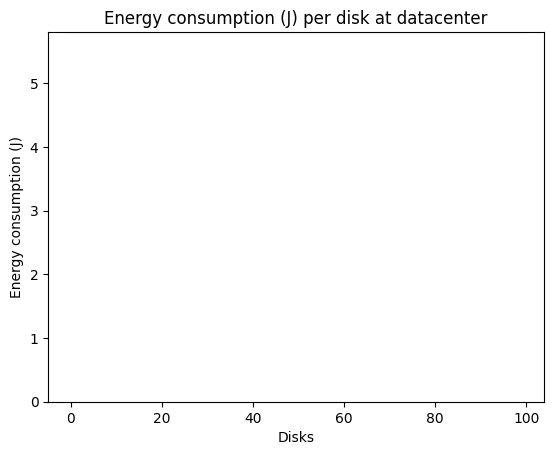

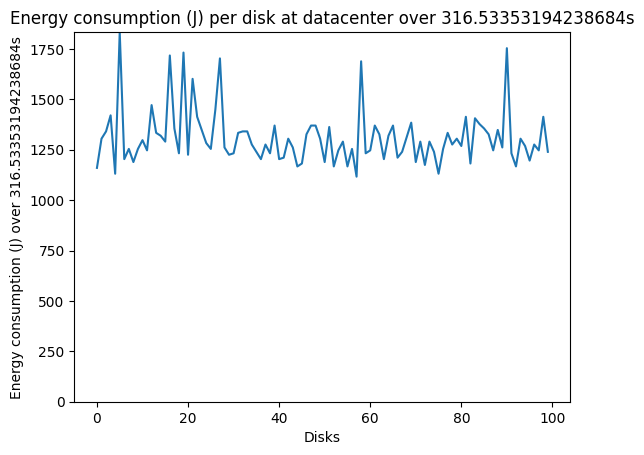

The cloud providers current storage area network consumes 0.5800000000000001 Kilo Joules (kJ).
 The cloud provider could also have 0 disks powered off.

The cloud providers current storage area network is consuming 130.83880462102627 Kilo Joules (kJ) over the duration 316.53353194238684s.
 The cloud provider could also have 0 disks powered off.


In [7]:
labels = np.unique(dataset['datacenter_name'])
current_power = 0
current_power_per_disk = np.array([])

current_power_consumed = 0
current_power_consumed_per_disk = np.array([])

duration = dataset['duration'][0]
disks_powered_off = 0
for i in range(len(labels)):
    current_power_per_datacenter = 0
    current_power_per_disk_per_datacenter = np.array([])
    
    current_power_consumed_per_datacenter = 0
    current_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    disks_powered_off_at_datacenter = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # If capacity used is 0, the disk is powered off
        consumed_active_power = 0
        consumed_idle_power = 0
        current_disk_power = 0
        if sample['capacity_used'] != 0:
            consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
            consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
            
            if float(sample['active_duration']) != 0:
                current_disk_power = float(sample['active_power'])
            else:
                current_disk_power = 0
                disks_powered_off += 1
                disks_powered_off_at_datacenter += 1
        else:
            current_disk_power = 0
            disks_powered_off += 1
            disks_powered_off_at_datacenter += 1
        
        current_power_per_datacenter += current_disk_power
        current_power_per_disk = np.append(current_power_per_disk, current_disk_power)
        current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, current_disk_power)
        
        current_power_consumed_per_datacenter += consumed_active_power + consumed_idle_power
        current_power_consumed_per_disk = np.append(current_power_consumed_per_disk, consumed_active_power + consumed_idle_power)
        current_power_consumed_per_disk_per_datacenter = np.append(current_power_consumed_per_disk_per_datacenter, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
        
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure consumes {(current_power_per_datacenter * 1)/1000} Kilo Joules (kJ).\n The datacenter could also have {disks_powered_off_at_datacenter} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(current_power_consumed_per_datacenter * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The datacenter could also have {disks_powered_off_at_datacenter} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?
    current_power += current_power_per_datacenter
    current_power_consumed += current_power_consumed_per_datacenter
    
    plt.plot(np.arange(0, len(current_power_per_disk_per_datacenter)), (current_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(current_power_consumed_per_disk_per_datacenter)), (current_power_consumed_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_consumed_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J) over {duration}s")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(current_power * 1)/1000} Kilo Joules (kJ).\n The cloud provider could also have {disks_powered_off} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(current_power_consumed * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The cloud provider could also have {disks_powered_off} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?